<a href="https://colab.research.google.com/github/kanikabanjare11/Real-Time-Adaptive-Credit-Scoring/blob/main/Real_Time_Adaptive_Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)



{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [3]:
!pip install ucimlrepo

In [5]:
X.shape

(30000, 23)

Dataset Overview:
                   X1            X2            X3            X4            X5  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

                 X6            X7            X8            X9           X10  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.12

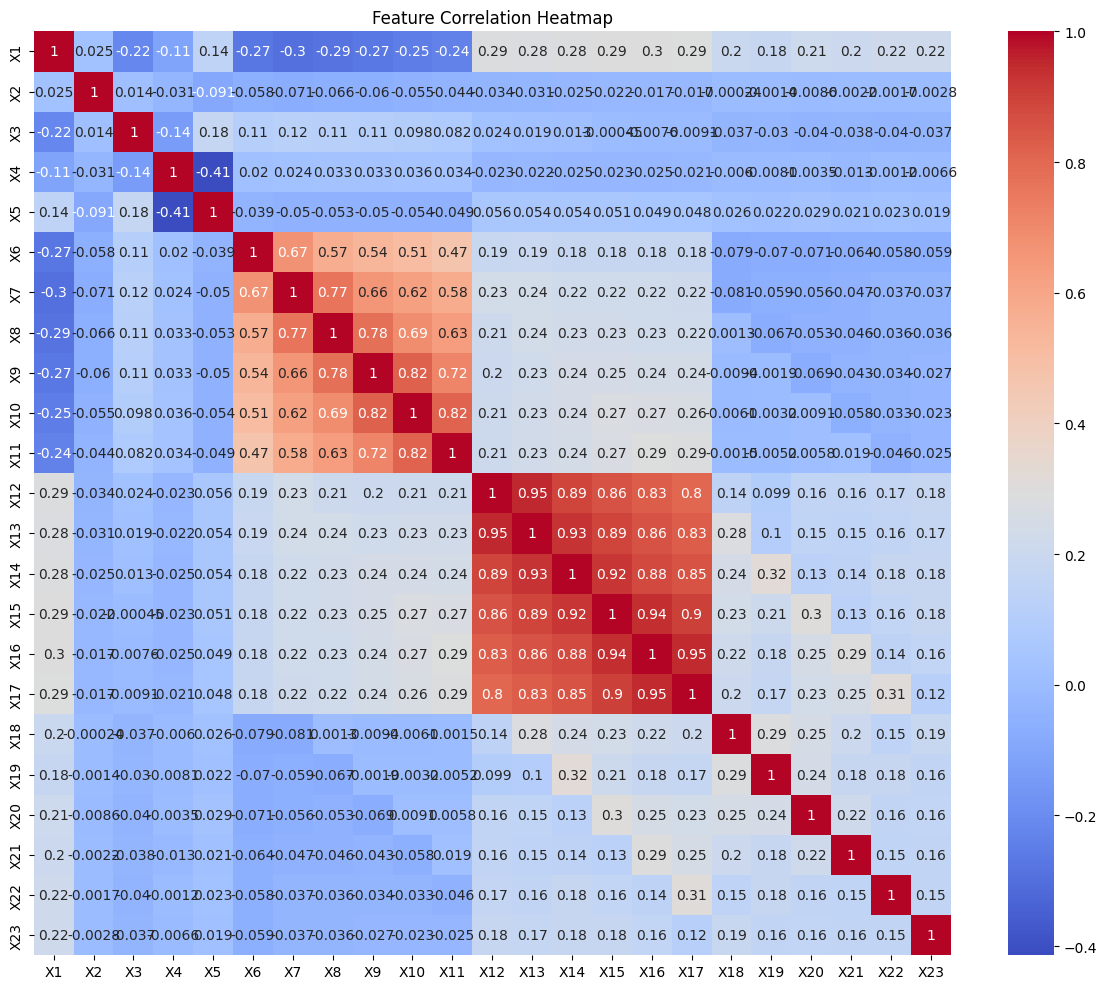

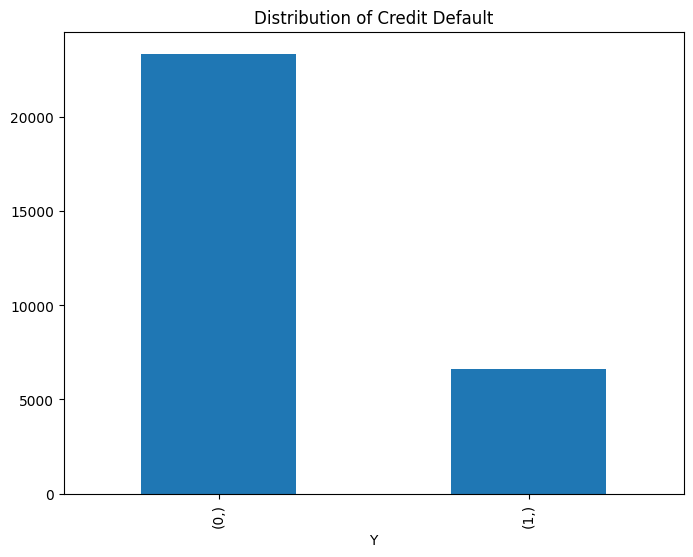

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Random Forest Results:
Cross-Validation Scores: [0.81458333 0.82020833 0.81791667 0.81458333 0.813125  ]
Mean CV Score: 0.8161
Train Accuracy: 0.9994
Test Accuracy: 0.8160


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Neural Network Results:
Train Accuracy: 0.8233
Test Accuracy: 0.8175


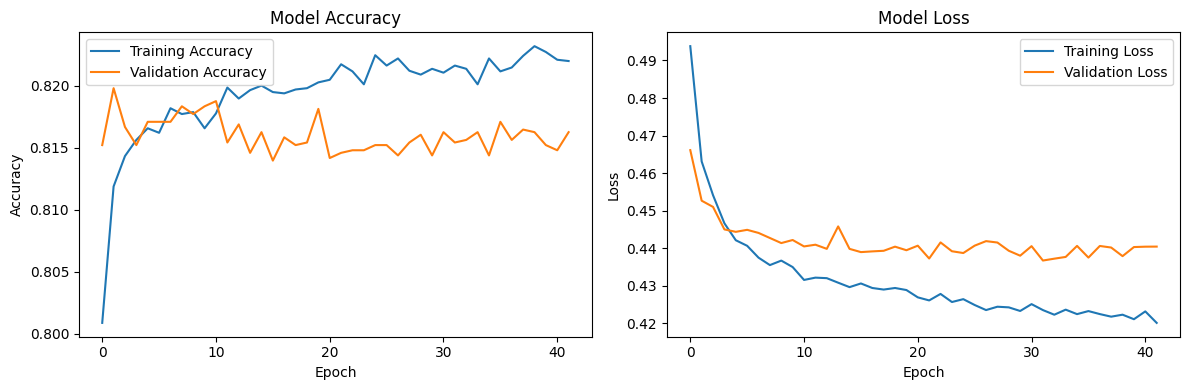

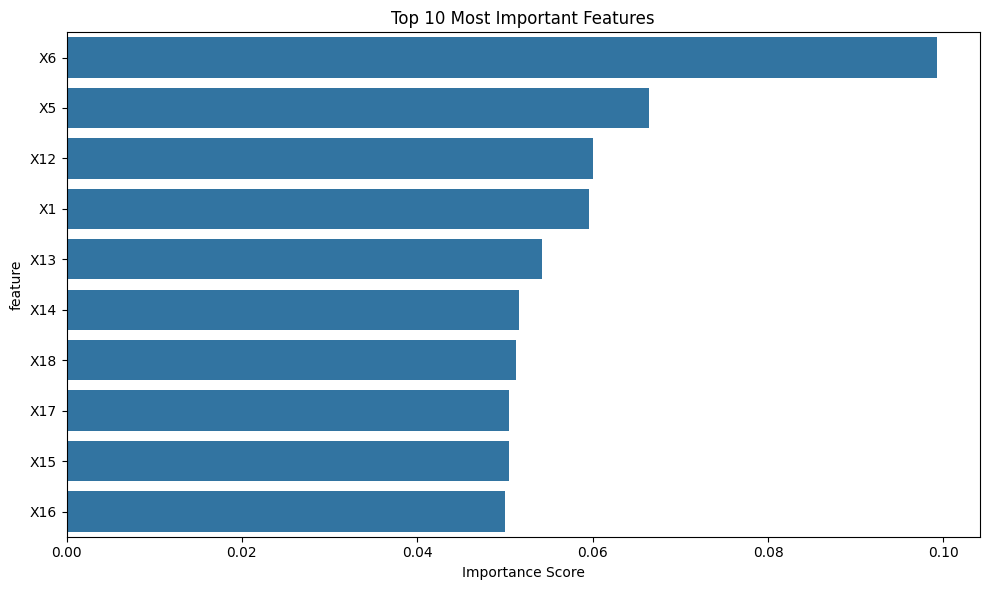


Top 5 Important Features:
   feature  importance
5       X6    0.099212
4       X5    0.066405
11     X12    0.060087
0       X1    0.059578
12     X13    0.054260


In [6]:
# Comprehensive Credit Scoring Implementation with UCI Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# UCI ML Repository Data Loader
from ucimlrepo import fetch_ucirepo

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

class CreditScoringProject:
    def __init__(self):
        # Fetch UCI Dataset
        self.dataset = fetch_ucirepo(id=350)  # Credit Card Default Dataset

        # Prepare data
        self.X = self.dataset.data.features
        self.y = self.dataset.data.targets

        # Convert to pandas for easier manipulation
        self.X = pd.DataFrame(self.X, columns=self.dataset.data.feature_names)
        self.y = pd.DataFrame(self.y, columns=self.dataset.data.target_names)

    def exploratory_data_analysis(self):
        """Perform comprehensive EDA"""
        # Basic Statistics
        print("Dataset Overview:")
        print(self.X.describe())

        # Missing Values Check
        print("\nMissing Values:")
        print(self.X.isnull().sum())

        # Correlation Heatmap
        plt.figure(figsize=(12, 10))
        correlation_matrix = self.X.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Feature Correlation Heatmap')
        plt.tight_layout()
        plt.show()

        # Distribution of Target Variable
        plt.figure(figsize=(8, 6))
        self.y.value_counts().plot(kind='bar')
        plt.title('Distribution of Credit Default')
        plt.show()

    def preprocess_data(self):
        """Prepare data for modeling"""
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        # Scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test

    def random_forest_model(self, X_train, X_test, y_train, y_test):
        """Random Forest Classifier"""
        rf_pipeline = Pipeline([
            ('classifier', RandomForestClassifier(
                n_estimators=100,
                random_state=42
            ))
        ])

        # Cross-validation
        cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5)

        # Fit the model
        rf_pipeline.fit(X_train, y_train)

        # Evaluate
        train_score = rf_pipeline.score(X_train, y_train)
        test_score = rf_pipeline.score(X_test, y_test)

        print("Random Forest Results:")
        print(f"Cross-Validation Scores: {cv_scores}")
        print(f"Mean CV Score: {cv_scores.mean():.4f}")
        print(f"Train Accuracy: {train_score:.4f}")
        print(f"Test Accuracy: {test_score:.4f}")

        return rf_pipeline

    def deep_learning_model(self, X_train, X_test, y_train, y_test):
        """Neural Network Model"""
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Early stopping
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

        print("\nNeural Network Results:")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")

        # Plotting training history
        plt.figure(figsize=(12, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

        return model

    def feature_importance(self, model):
        """Analyze feature importance"""
        # For Random Forest
        if isinstance(model, Pipeline):
            feature_importance = model.named_steps['classifier'].feature_importances_
            feature_names = self.X.columns

            # Create DataFrame of feature importances
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': feature_importance
            }).sort_values('importance', ascending=False)

            # Plot feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='importance', y='feature', data=importance_df.head(10))
            plt.title('Top 10 Most Important Features')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()

        return importance_df

def main():
    # Initialize the project
    credit_scoring_project = CreditScoringProject()

    # Perform Exploratory Data Analysis
    credit_scoring_project.exploratory_data_analysis()

    # Preprocess the data
    X_train, X_test, y_train, y_test = credit_scoring_project.preprocess_data()

    # Train Random Forest Model
    rf_model = credit_scoring_project.random_forest_model(
        X_train, X_test, y_train, y_test
    )

    # Train Deep Learning Model
    dl_model = credit_scoring_project.deep_learning_model(
        X_train, X_test, y_train, y_test
    )

    # Analyze Feature Importance
    feature_importance = credit_scoring_project.feature_importance(rf_model)
    print("\nTop 5 Important Features:")
    print(feature_importance.head())

if __name__ == "__main__":
    main()